In [42]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
from ECM_model import ECM

In [43]:
model = ECM()

def current_function(t):
    return 0.5 * (t < 10) - 0.5 * (t > 10) + 1 * (t > 20.101010) - 1 * (t > 30.101010) + 1 * (t > 40.202020) - 1 * (t > 50.202020)

def eta_function(i):
    return 1 * (i >= 0) + 0.99 * (i < 0)
    
def M_function(i):
    return 0.1 * (i >= 0) - 0.1 * (i < 0)

parameter_values = pybamm.ParameterValues(
    {'Ambient temperature [K]': 298.15,
    'Capactior [F]': 38000, 
    'Charge efficiency': eta_function, 
    'Current function [A]': current_function,
    'Equivalent series resistance in R_0 [Ohm]': 0.0082,
    'Equivalent series resistance in R_1 [Ohm]': 0.0158,
    'Maximum polarisation due to hysteresis': M_function, 
    'Negative electrode thickness [m]': 8.52e-05, 
    'Negative particle radius [m]': 5.86e-06,
    'Nominal cell capacity [A.h]': 5.0,
    'Number of cells connected in series to make a battery': 1.0, 
    'Positive electrode thickness [m]': 7.56e-05,
    'Positive particle radius [m]': 5.22e-06,
    'Rate constant': 2,
    'Separator thickness [m]': 1.2e-05,
    'Total charge capacity [C]': 5,
    'citations': ['Chen2020']}
)

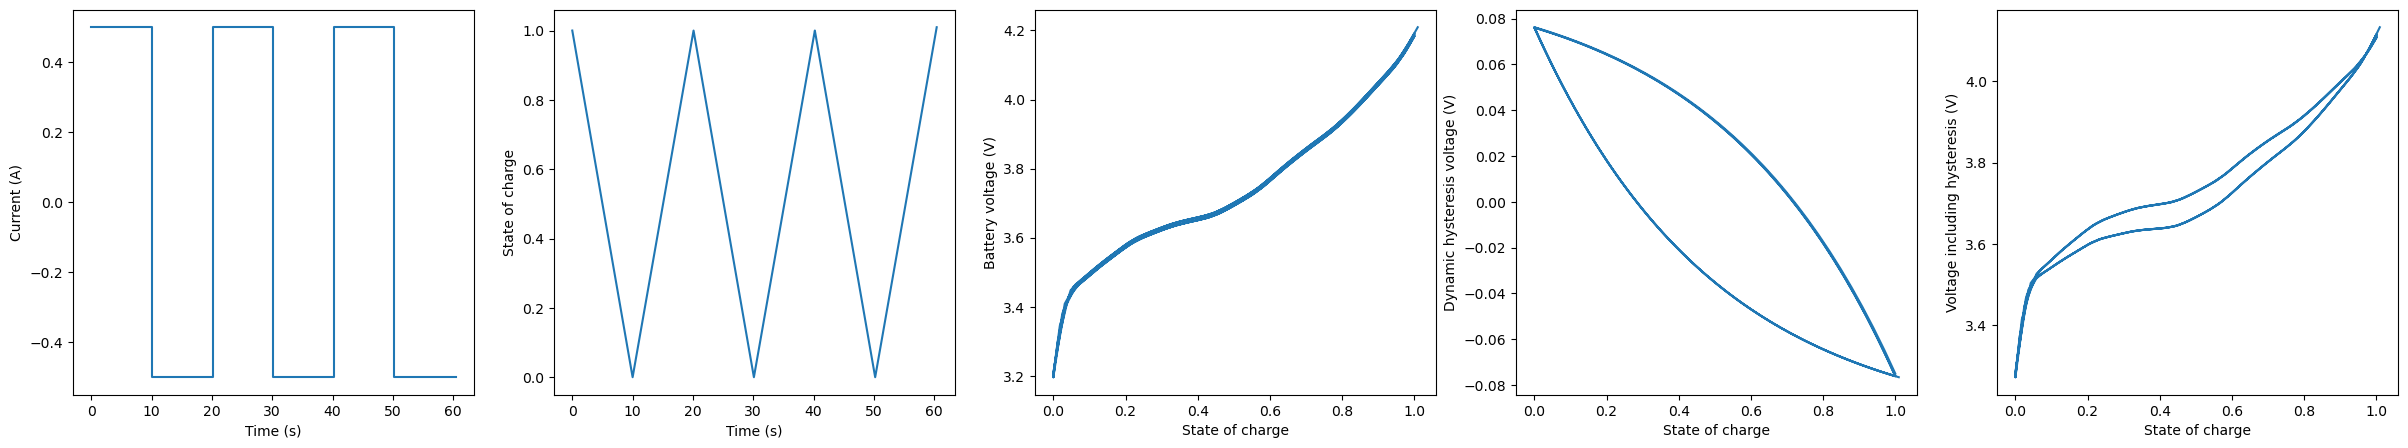

In [44]:
'''experiment = pybamm.Experiment(
    ([(f"Discharge at C/10 for 2 seconds")] + [(f"Discharge at C/10 for 2 seconds")] + [(f"Discharge at C/10 for 2 seconds")] + [(f"Discharge at C/10 for 2 seconds")] + [(f"Discharge at C/10 for 2 seconds")]
    + [(f"Charge at C/10 for 2.0202 seconds")] + [(f"Charge at C/10 for 2.0202 seconds")] + [(f"Charge at C/10 for 2.0202 seconds")] + [(f"Charge at C/10 for 2.0202 seconds")] + [(f"Charge at C/10 for 2.0202 seconds")])*5,
)'''

sim = pybamm.Simulation(model, parameter_values=parameter_values)
t_eval = np.linspace(0, 60.40, 200)
sol = sim.solve(t_eval,calc_esoh=False)

fig, ax = plt.subplots(1, 5, figsize=(30, 5))
t = sol["Time [s]"].data
i = sol["Current variable [A]"].data
V = sol["Battery voltage [V]"].data
h = sol["Dynamic hysteresis voltage [V]"].data
z = sol["State of charge"].data

ax[0].plot(t, i)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Current (A)")

ax[1].plot(t, z)
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("State of charge")

ax[2].plot(z, V)
ax[2].set_xlabel("State of charge")
ax[2].set_ylabel("Battery voltage (V)")

ax[3].plot(z, h)
ax[3].set_xlabel("State of charge")
ax[3].set_ylabel("Dynamic hysteresis voltage (V)")

ax[4].plot(z, h+V)
ax[4].set_xlabel("State of charge")
ax[4].set_ylabel("Voltage including hysteresis (V)")

plt.show()